In [ ]:
import numpy as np

import pandas as pd

import os

import CalculatedFieldSubroutines as cfs

import matplotlib.pyplot as plt

def disengageCount(time_sorted_chassis_df):
    #Pull ternary from chassis 
    time_sorted_chassis_df["TernaryDrivingModeTransition"].value_counts()
    #L
    chassis_new = time_sorted_chassis_df[time_sorted_chassis_df["TernaryDrivingModeTransition"] == -1]
     #Create empty lists for red, blue, and green 
    ads_index = pd.read_csv("/home/ddrobnjak_linux/Desktop/TDMprivate/ads_data_index_w_percentage.csv")
    #Get ids
    blue_ids = ads_index[ads_index["route"]=="Blue Route"]["groupMetadataID"]
    red_ids = ads_index[ads_index["route"]=="RedRoute"]["groupMetadataID"]
    green_ids = ads_index[ads_index["route"]=="GreenRoute"]["groupMetadataID"]
    #Separate disengagements based on route type
    blue_df = chassis_new[chassis_new["groupMetadataID"].isin(blue_ids)]
    red_df = chassis_new[chassis_new["groupMetadataID"].isin(red_ids)]
    green_df = chassis_new[chassis_new["groupMetadataID"].isin(green_ids)]
    #For loop
    blue_count = blue_df["groupMetadataID"].value_counts(sort = False)
    red_count = red_df["groupMetadataID"].value_counts(sort = False)
    green_count = green_df["groupMetadataID"].value_counts(sort = False)
    blue_count = blue_count.sort_values("time")
    red_count = red_count.sort_values("time")
    green_count = green_count.sort_values("time")
    labels_blue = ["Run 5", "Run 10", "Run 15", "Run 20", "Run 25", "Run 30", "Run 35", "Run 40", "Run 45", "Run 50", "Run 55", "Run 60", "Run 65", "Run 70", "Run 75", "Run 80", "Run 85", "Run 90", "Run 95", "Run 100", "Run 105", "Run 110"]
    plt.plot(blue_count)
    plt.xticks(np.arange(0, 110, 5), labels_blue, rotation ='vertical')
    plt.xlabel("Blue Runs")
    plt.ylabel("Disengagement Count")
    plt.show()
    labels_red = ["Run 5", "Run 10", "Run 15", "Run 20", "Run 25", "Run 30", "Run 35", "Run 40", "Run 45", "Run 50", "Run 55", "Run 60", "Run 65", "Run 70", "Run 75", "Run 80"]
    plt.plot(red_count)
    plt.xticks(np.arange(0, 80, 5), labels_red, rotation ='vertical')
    plt.xlabel("Red Runs")
    plt.ylabel("Disengagement Count")
    plt.show()
    labels_green = ["Run 5", "Run 10", "Run 15", "Run 20", "Run 25", "Run 30", "Run 35", "Run 40", "Run 45", "Run 50", "Run 55", "Run 60", "Run 65", "Run 70", "Run 75", "Run 80", "Run 85", "Run 90", "Run 95"]
    plt.plot(green_count)
    plt.xticks(np.arange(0, 95, 5), labels_green, rotation ='vertical')
    plt.xlabel("Green Runs")
    plt.ylabel("Disengagement Count")
    plt.show()
    
#def rowPercent(time_sorted_chassis_df):
    #time_sorted_chassis_df["rowPercent"] = 

In [61]:
import numpy as np

import pandas as pd

import os

import CalculatedFieldSubroutines as cfs

import matplotlib.pyplot as plt



In [75]:
def disengageCount(time_sorted_gmid):
    disengagementList = time_sorted_gmid["TernaryDrivingModeTransition"][time_sorted_gmid["TernaryDrivingModeTransition"]== -1]
    disengagementLength = len(disengagementList)
    routecolor = cfs.give_route(time_sorted_gmid["groupMetadataID"][0])
    #print(time_sorted_gmid["time"])
    lasttime = list(time_sorted_gmid["time"])[-1]
    return disengagementLength, routecolor, lasttime
    

In [94]:
gmid_list = cfs.list_gmIDs()

topic_list = cfs.list_topics()
print(topic_list)

['/apollo/sensor/gnss/best/pose', '/apollo/drive/event', '/apollo/canbus/chassis', '/apollo/perception/traffic/light']


In [70]:
testdataFrame = cfs.retrieve_gmID_topic(gmid_list[0],'/apollo/canbus/chassis')
testdataFrame = testdataFrame.sort_values("time")
cfs.BinaryDrivingMode(testdataFrame)
cfs.TernaryDrivingModeTransition(testdataFrame)

In [77]:
disengageCount(testdataFrame)

(0, 'Red', 1707423977294017122)

In [95]:
red_counts = np.array([])
red_times = np.array([])
green_counts = np.array([])
green_times = np.array([])
blue_counts = np.array([])
blue_times = np.array([])
for gmid in gmid_list:
    df = cfs.retrieve_gmID_topic(gmid, '/apollo/canbus/chassis')
    df.sort_values("time")
    cfs.BinaryDrivingMode(df)
    cfs.TernaryDrivingModeTransition(df)
    count, route, lasttime = disengageCount(df)
    if count == 0:
        continue
    if route == "Red":
        red_counts = np.append(red_counts , count)
        red_times = np.append(red_times , lasttime)
    elif route == "Blue":
        blue_counts = np.append(blue_counts ,count)
        blue_times = np.append(blue_times ,lasttime)
    elif route == "Green":
        green_counts = np.append(green_counts ,count)
        green_times = np.append(green_times ,lasttime)

In [96]:
print(len(red_times) , len(red_counts))
print(len(blue_times) , len(blue_counts))
print(len(green_times) , len(green_counts))

67 67
97 97
81 81


In [97]:
sorted_red_counts = red_counts[np.argsort(red_times)]
sorted_blue_counts = blue_counts[np.argsort(blue_times)]
sorted_green_counts = green_counts[np.argsort(green_times)]

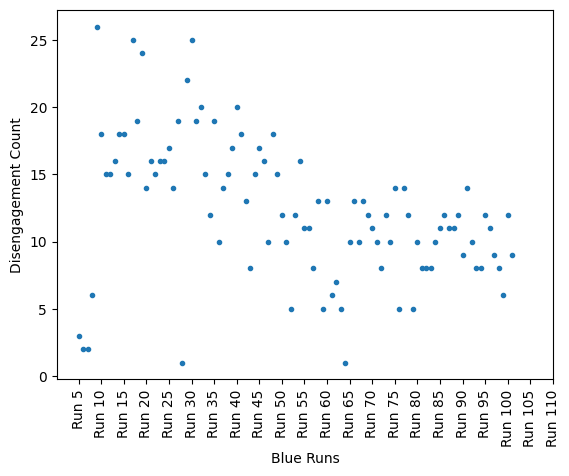

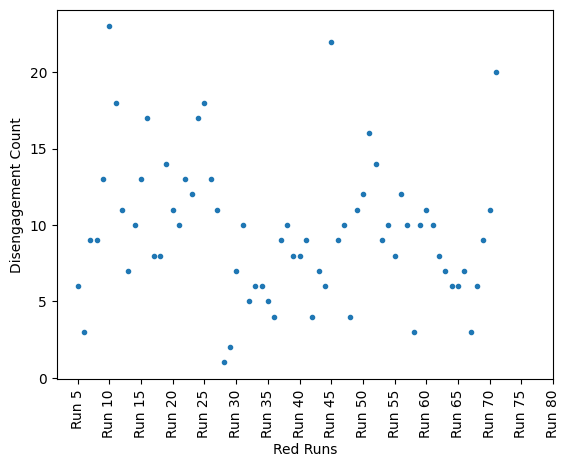

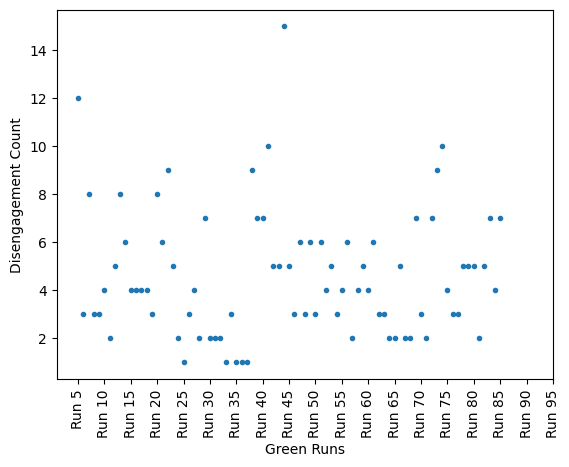

In [99]:
labels_blue = ["Run 5", "Run 10", "Run 15", "Run 20", "Run 25", "Run 30", "Run 35", "Run 40", "Run 45", "Run 50", "Run 55", "Run 60", "Run 65", "Run 70", "Run 75", "Run 80", "Run 85", "Run 90", "Run 95", "Run 100", "Run 105", "Run 110"]
plt.plot(sorted_blue_counts, marker = ".", ls = "" )
plt.xticks(np.arange(0, 110, 5), labels_blue, rotation ='vertical')
plt.xlabel("Blue Runs")
plt.ylabel("Disengagement Count")
plt.show()
labels_red = ["Run 5", "Run 10", "Run 15", "Run 20", "Run 25", "Run 30", "Run 35", "Run 40", "Run 45", "Run 50", "Run 55", "Run 60", "Run 65", "Run 70", "Run 75", "Run 80"]
plt.plot(sorted_red_counts, marker = ".", ls = "" )
plt.xticks(np.arange(0, 80, 5), labels_red, rotation ='vertical')
plt.xlabel("Red Runs")
plt.ylabel("Disengagement Count")
plt.show()
labels_green = ["Run 5", "Run 10", "Run 15", "Run 20", "Run 25", "Run 30", "Run 35", "Run 40", "Run 45", "Run 50", "Run 55", "Run 60", "Run 65", "Run 70", "Run 75", "Run 80", "Run 85", "Run 90", "Run 95"]
plt.plot(sorted_green_counts, marker = ".", ls = "" )
plt.xticks(np.arange(0, 95, 5), labels_green, rotation ='vertical')
plt.xlabel("Green Runs")
plt.ylabel("Disengagement Count")
plt.show()

In [47]:
import numpy as np

import pandas as pd

import os

import CalculatedFieldSubroutines as cfs

def timeProgress(time_sorted_chassis_df):
    ads_index = pd.read_csv("/home/ddrobnjak_linux/Desktop/TDMprivate/ads_data_index_w_percentage.csv")
    #Get ids
    blue_ids = ads_index[ads_index["route"]=="Blue Route"]["groupMetadataID"]
    red_ids = ads_index[ads_index["route"]=="RedRoute"]["groupMetadataID"]
    green_ids = ads_index[ads_index["route"]=="GreenRoute"]["groupMetadataID"]
    #Separate disengagements based on route type
    blue_df = time_sorted_chassis_df[time_sorted_chassis_df["groupMetadataID"].isin(blue_ids)]
    red_df = time_sorted_chassis_df[time_sorted_chassis_df["groupMetadataID"].isin(red_ids)]
    green_df = time_sorted_chassis_df[time_sorted_chassis_df["groupMetadataID"].isin(green_ids)]
    blue_total = len(blue_df)
    red_total = len(red_df)
    green_total = len(green_df)
    #for  in range(blue_total):
    blue_df['percentage'] = ((blue_df.index + 1) / blue_total) * 100
    red_df['percentage'] = ((red_df.index + 1) / red_total) * 100
    green_df['percentage'] = ((green_df.index + 1) / green_total) * 100
    print(blue_df['percentage'])
    print(red_df['percentage'])
    print(green_df['percentage'])
        

In [39]:
import numpy as np

import pandas as pd

import os

import CalculatedFieldSubroutines as cfs

def runPercent(time_sorted_chassis_df):
    #ads_index = pd.read_csv("/home/ddrobnjak_linux/Desktop/TDMprivate/ads_data_index_w_percentage.csv")
    #Get ids
    #run_ids = list(ads_index["groupMetadataID"])
    #print(run_ids)
    #Separate disengagements based on route type
    row_count = []
    for i in range(time_sorted_chassis_df.shape[0]):
      row_count.append(i + 1)
    row_array = np.array(row_count)
    row_total = time_sorted_chassis_df.shape[0]
    row_percentage = (row_array/row_total) * 100
    time_sorted_chassis_df["percentage"] = row_percentage
    #for id in run_ids:
        #run_df = time_sorted_chassis_df[time_sorted_chassis_df["groupMetadataID"] == id]
        #run_total = len(run_df)
        #for  in range(blue_total):
        #time_sorted_chassis_df[time_sorted_chassis_df["groupMetadataID"] == id]['percentage'] = ((run_df.index + 1) / run_total) * 100
        #run_list.append(run_df['percentage'])
         

In [48]:
import CalculatedFieldSubroutines as cfs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

gmids = cfs.list_gmIDs()
topics = cfs.list_topics()

df = pd.DataFrame()
for id in gmids:
    path = f'{ cfs.origin_dir() }/data/{ id }/_apollo_canbus_chassis/{ id}_apollo_canbus_chassis.csv'

    temp = pd.read_csv( path )
    temp = temp.sort_values("time")
    runPercent(temp)
    cfs.BinaryDrivingMode(temp)
    cfs.TernaryDrivingModeTransition(temp)
    df = pd.concat([df,temp])





In [49]:
df.head()

,brakePercentage,groupMetadataID,drivingMode,speedMps,time,throttlePercentage,steeringPercentage,signal.turnSignal,percentage,BinaryDrivingMode,TernaryDrivingModeTransition
0,0.0,662741a4-f38a-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.85,1707422440418133661,17.7,-78.648384,TURN_RIGHT,0.002148,0,0
1,0.0,662741a4-f38a-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.86,1707422440449984871,17.7,-78.462296,TURN_RIGHT,0.004297,0,0
2,0.0,662741a4-f38a-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.90,1707422440485594770,17.7,-78.129290,TURN_RIGHT,0.006445,0,0
3,0.0,662741a4-f38a-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.91,1707422440515818828,17.8,-77.874630,TURN_RIGHT,0.008593,0,0
4,0.0,662741a4-f38a-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.92,1707422440550235806,17.8,-77.522030,TURN_RIGHT,0.010741,0,0


In [63]:
disengageCount(df)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [15]:
timeProgress(df)

/tmp/ipykernel_8035/3837102941.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blue_df['percentage'] = ((blue_df.index + 1) / blue_total) * 100
/tmp/ipykernel_8035/3837102941.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_df['percentage'] = ((red_df.index + 1) / red_total) * 100
/tmp/ipykernel_8035/3837102941.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

0        0.000015
1        0.000030
2        0.000045
3        0.000060
4        0.000075
           ...   
54944    0.823833
54945    0.823848
54946    0.823863
54947    0.823878
54948    0.823893
Name: percentage, Length: 6669432, dtype: float64
0        0.000019
1        0.000039
2        0.000058
3        0.000077
4        0.000097
           ...   
47622    0.919712
47623    0.919731
47624    0.919751
47625    0.919770
47626    0.919789
Name: percentage, Length: 5178034, dtype: float64
0        0.000036
1        0.000072
2        0.000109
3        0.000145
4        0.000181
           ...   
22177    0.803653
22178    0.803689
22179    0.803725
22180    0.803762
22181    0.803798
Name: percentage, Length: 2759649, dtype: float64


In [ ]:
runPercent(df)

In [54]:
df.head(50)

,brakePercentage,groupMetadataID,drivingMode,speedMps,time,throttlePercentage,steeringPercentage,signal.turnSignal,percentage,BinaryDrivingMode,TernaryDrivingModeTransition
0,0.0,662741a4-f38a-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.85,1707422440418133661,17.7,-78.648384,TURN_RIGHT,0.002148,0,0
1,0.0,662741a4-f38a-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.86,1707422440449984871,17.7,-78.462296,TURN_RIGHT,0.004297,0,0
2,0.0,662741a4-f38a-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.90,1707422440485594770,17.7,-78.129290,TURN_RIGHT,0.006445,0,0
3,0.0,662741a4-f38a-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.91,1707422440515818828,17.8,-77.874630,TURN_RIGHT,0.008593,0,0
4,0.0,662741a4-f38a-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.92,1707422440550235806,17.8,-77.522030,TURN_RIGHT,0.010741,0,0
5,0.0,662741a4-f38a-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.94,1707422440582133257,18.0,-77.296770,TURN_RIGHT,0.012890,0,0
6,0.0,662741a4-f38a-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.95,1707422440617621538,18.0,-77.110670,TURN_RIGHT,0.015038,0,0
7,0.0,662741a4-f38a-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.95,1707422440645877719,18.0,-76.865814,TURN_RIGHT,0.017186,0,0
8,0.0,662741a4-f38a-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.97,1707422440682438099,18.2,-76.718900,TURN_RIGHT,0.019334,0,0
9,0.0,662741a4-f38a-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,3.97,1707422440713856659,18.9,-76.523020,TURN_RIGHT,0.021483,0,0


In [42]:
df.tail()

,brakePercentage,groupMetadataID,drivingMode,speedMps,time,throttlePercentage,steeringPercentage,signal.turnSignal,BinaryDrivingMode,TernaryDrivingModeTransition,percentage
47622,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,0.0,1707422048839821424,0.0,85.3477,TURN_NONE,0,0,99.999973
47623,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,0.0,1707422048872098616,0.0,85.3477,TURN_NONE,0,0,99.999979
47624,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,0.0,1707422048905769009,0.0,85.3477,TURN_NONE,0,0,99.999986
47625,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,0.0,1707422048937951514,0.0,85.3477,TURN_NONE,0,0,99.999993
47626,0.0,0b72a836-f37e-11ee-bb4e-fb353e7798cd,COMPLETE_MANUAL,0.0,1707422048971754532,0.0,85.3477,TURN_NONE,0,0,100.000000
